In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance

n_dimensions=3
n_points=100

#Create samples on a unit sphere in desired dimensions
def hypersphere(npoints, ndim):
    np.random.seed(1)
    vec=np.random.randn(ndim,npoints) #creates a random sample from a Gaussian distribution in the form of an array of dimensions: ndim x npoints
    vec/=np.linalg.norm(vec,axis=0) #divides each vector by its norm, which turns each vector into a unit vector (length 1). Here we obtain samples from the unit sphere in the dimension we stated in the beginning of the function.
    return(vec)

In [14]:
#Randomly select a point on the hypersphere to be the center of the ball
random.seed(1)
hsphere=hypersphere(n_points,n_dimensions)
dim_array=np.shape(hsphere) #defines the shape of the array
rng=random.randint(0,dim_array[1])#pulls random number from 0 to n_points and assign to rng
center_ball=hsphere[:,rng] #uses randomly generated number to extract one row of points
print(center_ball)
print(hsphere[0:2,0])

[-0.46457661 -0.85509238 -0.23018598]
[ 0.93795301 -0.25818745]


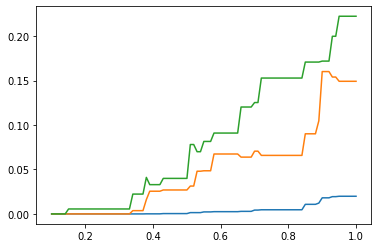

In [15]:
radii = np.arange(.1,1.01,.01) #creates an array of radii values to iterate through
eigval_list = [] #creates empty list to store eigen values

#Find the points on the hypersphere within each radii
for i in radii: #iteratest through each radii value
    X=[] #creates an empty array to be filled in with the values on the hypersphere that fall within the ball radii
    for j in np.arange(0,n_points): #iterates through array of index values for each point
        if distance.euclidean(hsphere[:,j],center_ball)<=i: #selects points whose distance to center is shorter than the length of the radius
            X.append(hsphere[:,j])
    X_mat=np.vstack(X)
    dim_X=np.shape(X_mat) #saves dimensions of matrix for points within the current radius
    
    #Create the covariance matrix and save eigenvalues for each set X
    mean_X=np.mean(X_mat,axis=0) #calculates the mean of X
    X_centered= X_mat - mean_X #centers the set X by subtracting the mean from each point
    cov_X= 1/dim_X[0] * (X_centered.T @ X_centered) #calculates the covariance of the new centered set
    eigvals,eigvecs=np.linalg.eigh(cov_X) #computes the eigenvalues and eigenvectors of the covariance matrix and stores them in the respective variables
    eigval_list.append(eigvals) #appends the set of eigenvalues to the list created above
    
#Plot the eigenvalues
eig_mat=np.stack(eigval_list, axis=0) #stacks eigenvalue list into an array (dimensions of N x D)
dim_eig_mat=np.shape(eig_mat)
fig=plt.figure() #creates a figure plot
axes=fig.add_subplot(111) #adds x and y axes to the plot
for i in range(dim_eig_mat[1]):
    axes.plot(radii, eig_mat[:,i]) #plots eigenvalues (y-axis) against each radii value (x-axis) 
    
plt.show()

**The Cleaned Up Code (function):

In [2]:
def hypersphere(npoints, ndim):
    """
    This function creates samples on a unit sphere in desired dimensions.
    It requires the numpy package.
    
    Parameters:
        npoints (int): the number of points to be sampled
        ndim (int): the number of dimensions in which the unit sphere will be sampled
    """
    #Import necessary packages
    import numpy as np
    
    vec=np.random.randn(ndim,npoints) #creates a random sample from a Gaussian distribution in the form of an array of dimensions: ndim x npoints
    vec/=np.linalg.norm(vec,axis=0) #divides each vector by its norm, which turns each vector into a unit vector (length 1). Here we obtain samples from the unit sphere in the dimension we stated in the beginning of the function.
    return(vec)

### Function for obtaining eigenvalues while iterating through radii

def eigen_calc(cloud,center,radstart,radend,radint):
    """
    Version 1.0
    7/14/20
    Ryan Robinett
    Kyle Ruark
    
    This function iterates through specidic radii values and performs PCA at the given radius. These PCA values (eigenvalues) are then saved in a multidimensional list which can be used to plot in the function eigen_plot.
    Also, this function requires the numpy, random, and scipy packages for proper use.
    
    Parameters:
        cloud (arr): a multidimensional point cloud array that contains the coordinates of the points in the cloud
        center (arr): the desired point on which the sphere is centered
        radstart (int): the first radius value of the expanding sphere 
        radend (int): the final value (included) of the expanding spherical radius
        radint (int): the interval (step size) at which the radius expands
    """
    #Import necessary packages
    import numpy as np
    import random
    from scipy.spatial import distance
    
    dim_array=np.shape(cloud) #saves the dimensions of the array
    radii=np.arange(radstart,radend+radint,radint) #creates a list of the specified radii values
    eigval_list = [] #creates empty list to store eigenvalues
    
    #Find the points on the hypersphere within each radii
    for i in radii: #iterates through each radii value
        X=[] #creates an empty array to be filled in with the values on the hypersphere that fall within the ball radii
        for j in np.arange(0,dim_array[0]): #iterates through array of index values for each point
            if distance.euclidean(cloud[:,j],center)<=i: #selects points whose distance to center is shorter than the length of the radius
                X.append(cloud[:,j]) #appends selected points to the array X
        X_mat=np.vstack(X) #creates a 'matrix' by vertically stacking the elements of the list
        dim_X=np.shape(X_mat) #saves dimensions of matrix for points within the current radius
        
        #Create the covariance matrix and save eigenvalues for each set X
        mean_X=np.mean(X_mat,axis=0) #calculates the mean of X
        X_centered= X_mat - mean_X #centers the set X by subtracting the mean from each point
        cov_X= 1/dim_X[0] * (X_centered.T @ X_centered) #calculates the covariance of the new centered set
        eigvals,eigvecs=np.linalg.eigh(cov_X) #computes the eigenvalues and eigenvectors of the covariance matrix and stores them in the respective variables
        eigval_list.append(eigvals) #appends the set of eigenvalues to the list created above
        
    return(eigval_list)
        

        
### Function for plotting eigenvalues obtained in the above function

def eigen_plot(eigval_list):
    """
    Version 1.0
    7/14/20
    Ryan Robinett
    Kyle Ruark
    
    This function plots the multidimensional eigenvalue list created from the eigen_calc function. X-axis corresponds to the radii value, while the y-axis corresponds to the eigenvalues. Each individual line represents a dimension.
    Also, this function requires both the matplotlib and numpy packages.
    Run the code: %matplotlib inline, when in jupyter notebook to display the plot in the notebook.
    
    Parameters:
        eigval_list (list): This is a multidimensional list containing eigenvalues at different radii values 
    """
    #Import necessary packages
    import matplotlib.pyplot as plt
    import numpy as np
    
    #Plot the eigenvalues
    radii = np.arange(.1,1.01,.01) #creates an array of radii values to iterate through
    eig_mat=np.stack(eigval_list, axis=0) #stacks eigenvalue list into an array (dimensions of N x D)
    dim_eig_mat=np.shape(eig_mat) #saves dimensions of the eienvalue matrix for easy access
    fig=plt.figure() #creates a figure plot
    axes=fig.add_subplot(111) #adds x and y axes to the plot
    for i in range(dim_eig_mat[1]): #iterates through the columns (dimensions) of the eigenvalue matrix 
        axes.plot(radii, eig_mat[:,i]) #plots eigenvalues (y-axis) against each radii value (x-axis) 
        
    return(plt.show())

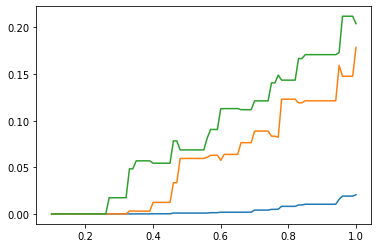

In [17]:
eigval_list=eigen_calc(100,3)
eigen_plot(eigval_list)

<h1>Grocery List for Kyle</h1>
<ol>
    <li>Migrate code from .ipynb to .py
    <ul>
        <li>Functions should be in a single file called 'mSVD.py'</li>
        <li>A separate file should be used to generate test plots</li>
    </ul></li>
    <li>Make 'eigen_calc' take in arbitrary point cloud X, arbitrary starting point x, varying radius arguments
    <ul>
        <li>I want to be able to take an arbitrary point cloud and run mSVD at a single point on it</li>
    </ul></li>
    <li>Make sure 'eigen_plot' works for higher-dimensional spheres</li>
</ol>